In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Population

In [2]:
pop_raw = pd.read_csv('world_populations.csv')

In [3]:
population = pop_raw[['Area Code', 'Area', 'Year', 'Value']]
population = population.rename(columns={'Value': 'Population'})

In [4]:
population.head(10)

,Area Code,Area,Year,Population
0,2,Afghanistan,1950,7752.118
1,2,Afghanistan,1951,7839.510
2,2,Afghanistan,1952,7934.980
3,2,Afghanistan,1953,8038.596
4,2,Afghanistan,1954,8150.447
5,2,Afghanistan,1955,8270.581
6,2,Afghanistan,1956,8399.030
7,2,Afghanistan,1957,8535.807
8,2,Afghanistan,1958,8680.946
9,2,Afghanistan,1959,8834.445


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14867 entries, 0 to 14866
Data columns (total 4 columns):
Area Code     14867 non-null int64
Area          14867 non-null object
Year          14867 non-null int64
Population    14867 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 464.7+ KB


## Crops

In [6]:
crops_raw = pd.read_csv('world_crops.csv',  encoding = 'latin1')

In [7]:
crops = crops_raw.groupby(['Area Code', 'Area', 'Element', 'Year', 'Unit']).agg({'Value': 'sum'}).reset_index().sort_values(['Area', 'Year'])
crops = crops.rename(columns={'Element': 'Agri_Element', 'Unit': 'Agri_Unit', 'Value': 'Agri_Value'})

In [8]:
crops.head(10)

,Area Code,Area,Agri_Element,Year,Agri_Unit,Agri_Value
78,2,Afghanistan,Area harvested,1961,ha,11834963.0
135,2,Afghanistan,Production,1961,tonnes,14449553.0
192,2,Afghanistan,Yield,1961,hg/ha,1787380.0
79,2,Afghanistan,Area harvested,1962,ha,12229684.0
136,2,Afghanistan,Production,1962,tonnes,14552363.0
193,2,Afghanistan,Yield,1962,hg/ha,1828888.0
80,2,Afghanistan,Area harvested,1963,ha,12358092.0
137,2,Afghanistan,Production,1963,tonnes,13760181.0
194,2,Afghanistan,Yield,1963,hg/ha,1830173.0
81,2,Afghanistan,Area harvested,1964,ha,12444122.0


In [9]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19918 entries, 78 to 18394
Data columns (total 6 columns):
Area Code       19918 non-null int64
Area            19918 non-null object
Agri_Element    19918 non-null object
Year            19918 non-null int64
Agri_Unit       19918 non-null object
Agri_Value      19918 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


## Emissions

In [10]:
emissions_raw = pd.read_csv('emissions.csv')

In [11]:
emissions = emissions_raw.groupby(['Area Code', 'Area', 'Element', 'Year', 'Unit']).agg({'Value': 'sum'}).reset_index().sort_values(['Area', 'Year'])
emissions = emissions.rename(columns={'Element': 'Emis_Element', 'Unit': 'Emis_Unit', 'Value': 'Emis_Value'})

In [12]:
emissions.head()

,Area Code,Area,Emis_Element,Year,Emis_Unit,Emis_Value
78,2,Afghanistan,Emissions (CH4),1961,gigagrams,285.7793
135,2,Afghanistan,Emissions (CO2eq),1961,gigagrams,9255.6779
192,2,Afghanistan,Emissions (N2O),1961,gigagrams,10.4978
79,2,Afghanistan,Emissions (CH4),1962,gigagrams,290.8671
136,2,Afghanistan,Emissions (CO2eq),1962,gigagrams,9331.0188


In [13]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36131 entries, 78 to 25796
Data columns (total 6 columns):
Area Code       36131 non-null int64
Area            36131 non-null object
Emis_Element    36131 non-null object
Year            36131 non-null int64
Emis_Unit       36131 non-null object
Emis_Value      36131 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.9+ MB


## Combined

In [26]:
combined = pd.merge(emissions, population, how='left', on=['Area Code', 'Area', 'Year'])
combined = pd.merge(combined, crops, how='left', on=['Area Code', 'Area', 'Year'])
combined = combined[
    ['Area Code', 'Area', 'Year', 
     'Emis_Element', 'Emis_Unit', 'Emis_Value', 
     'Agri_Element', 'Agri_Unit', 'Agri_Value', 
     'Population']
]

combined['Year'] = pd.to_datetime(combined['Year'], format='%Y')

In [27]:
combined.head(10)

,Area Code,Area,Year,Emis_Element,Emis_Unit,Emis_Value,Agri_Element,Agri_Unit,Agri_Value,Population
0,2,Afghanistan,1961-01-01,Emissions (CH4),gigagrams,285.7793,Area harvested,ha,11834963.0,9166.764
1,2,Afghanistan,1961-01-01,Emissions (CH4),gigagrams,285.7793,Production,tonnes,14449553.0,9166.764
2,2,Afghanistan,1961-01-01,Emissions (CH4),gigagrams,285.7793,Yield,hg/ha,1787380.0,9166.764
3,2,Afghanistan,1961-01-01,Emissions (CO2eq),gigagrams,9255.6779,Area harvested,ha,11834963.0,9166.764
4,2,Afghanistan,1961-01-01,Emissions (CO2eq),gigagrams,9255.6779,Production,tonnes,14449553.0,9166.764
5,2,Afghanistan,1961-01-01,Emissions (CO2eq),gigagrams,9255.6779,Yield,hg/ha,1787380.0,9166.764
6,2,Afghanistan,1961-01-01,Emissions (N2O),gigagrams,10.4978,Area harvested,ha,11834963.0,9166.764
7,2,Afghanistan,1961-01-01,Emissions (N2O),gigagrams,10.4978,Production,tonnes,14449553.0,9166.764
8,2,Afghanistan,1961-01-01,Emissions (N2O),gigagrams,10.4978,Yield,hg/ha,1787380.0,9166.764
9,2,Afghanistan,1962-01-01,Emissions (CH4),gigagrams,290.8671,Area harvested,ha,12229684.0,9345.868


In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75836 entries, 0 to 75835
Data columns (total 10 columns):
Area Code       75836 non-null int64
Area            75836 non-null object
Year            75836 non-null datetime64[ns]
Emis_Element    75836 non-null object
Emis_Unit       75836 non-null object
Emis_Value      75836 non-null float64
Agri_Element    59739 non-null object
Agri_Unit       59739 non-null object
Agri_Value      59739 non-null float64
Population      75575 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 6.4+ MB


In [29]:
#combined.to_csv('combined_project_3_data.csv')

In [67]:
test_grouped = combined.groupby('Year').agg({'Emis_Value': 'sum', 'Population': 'sum'}).reset_index()
test_grouped['Population'] = test_grouped['Population']/10000000
test_grouped['Emis_Value'] = test_grouped['Emis_Value']/1000000
test_grouped = test_grouped.round(2)
test_grouped.head()

,Year,Emis_Value,Population
0,1961-01-01,6.92,2.78
1,1962-01-01,7.05,2.83
2,1963-01-01,7.15,2.89
3,1964-01-01,7.38,2.95
4,1965-01-01,7.57,3.01


In [77]:
a = test_grouped['Year'].min()
b = test_grouped['Year'].max()
(b - a)
20454/365, a, b

(56.038356164383565,
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'))

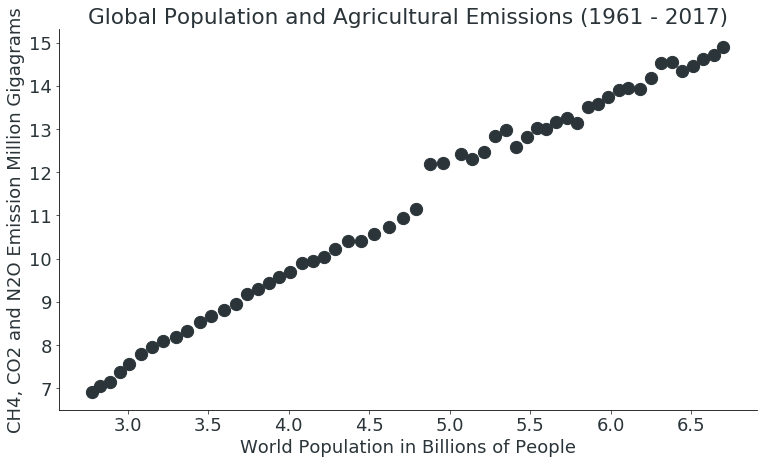

In [80]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

x = test_grouped['Year']
y1 = test_grouped['Emis_Value']
y2 = test_grouped['Population']

fig, ax = plt.subplots(1, figsize=[12.5, 7])

ax.scatter(
    y2, 
    y1,
    c = '#2a3439',
    edgecolors = '#2a3439',
    linewidths = 1,
    s = 150
)

ax.set_ylabel('CH4, CO2 and N2O Emission Million Gigagrams')
ax.set_xlabel('World Population in Billions of People')
ax.set_title('Global Population and Agricultural Emissions (1961 - 2017)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Static scatter.png', transparent=True)
plt.show()

In [20]:
grouped = combined.groupby(
    ['Year', 'Emis_Element', 'Agri_Element']
).agg(
    {
    'Emis_Value': 'sum',
    'Agri_Value': 'sum', 
    'Population': 'sum'
    }).reset_index()

In [21]:
grouped.head(10)

,Year,Emis_Element,Agri_Element,Emis_Value,Agri_Value,Population
0,1961,Emissions (CH4),Area harvested,6.247251e+04,2.036866e+09,2750469.999
1,1961,Emissions (CH4),Production,6.247316e+04,3.719281e+09,2750486.893
2,1961,Emissions (CH4),Yield,6.247212e+04,4.333860e+08,2750461.844
3,1961,Emissions (CO2eq),Area harvested,1.839396e+06,2.036866e+09,2750469.999
4,1961,Emissions (CO2eq),Production,1.839414e+06,3.719281e+09,2750486.893
5,1961,Emissions (CO2eq),Yield,1.839383e+06,4.333860e+08,2750461.844
6,1961,Emissions (N2O),Area harvested,1.701527e+03,2.036866e+09,2750469.999
7,1961,Emissions (N2O),Production,1.701543e+03,3.719281e+09,2750486.893
8,1961,Emissions (N2O),Yield,1.701512e+03,4.333860e+08,2750461.844
9,1962,Emissions (CH4),Area harvested,6.330712e+04,2.059622e+09,2802051.325


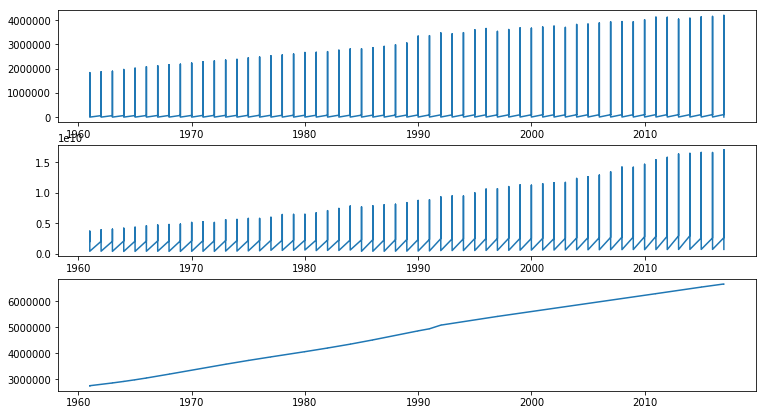

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = [12.5, 7])

ax1.plot(grouped['Year'], grouped['Emis_Value'])
ax2.plot(grouped['Year'], grouped['Agri_Value'])
ax3.plot(grouped['Year'], grouped['Population'])

plt.show()

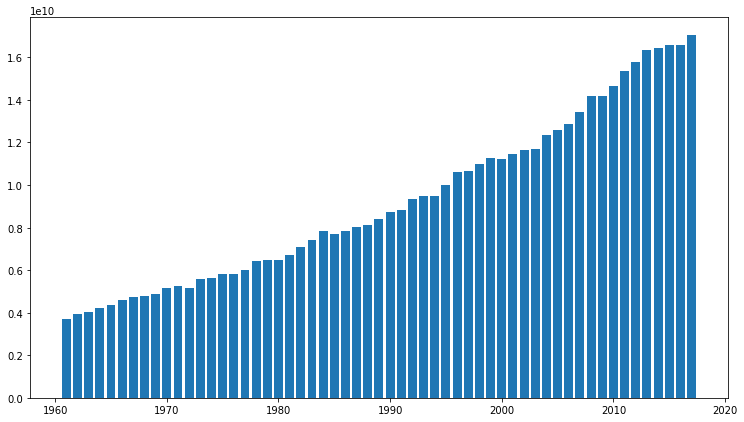

In [27]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.bar(grouped['Year'], grouped['Agri_Value'])

plt.show()

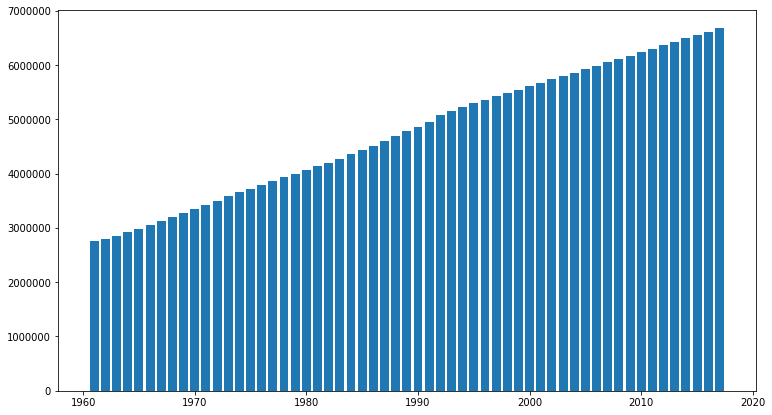

In [28]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.bar(grouped['Year'], grouped['Population'])

plt.show()